## Part 1: Assumptions for Inferential Regression


In [1]:
import numpy as np
import pandas as pd

from glm.glm import GLM
from glm.families import Gaussian

%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from scipy import stats

In [2]:
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/carData/Duncan.csv'
prestige = pd.read_csv(url)

credit_card = sm.datasets.ccard.load_pandas().data

1. Explore the datasets with a [scatter_matrix](https://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot) and a [boxplot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html).

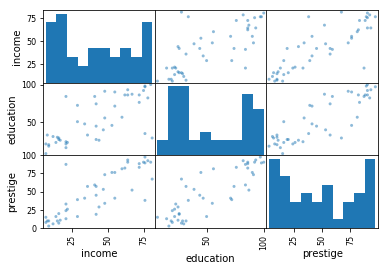

In [3]:
pd.plotting.scatter_matrix(prestige);

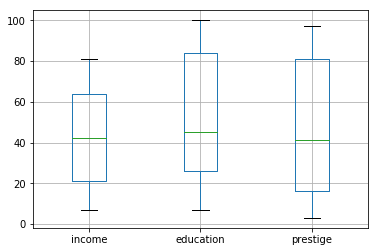

In [4]:
pd.plotting.boxplot(prestige);

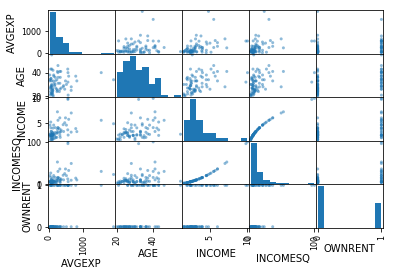

In [5]:
pd.plotting.scatter_matrix(credit_card);

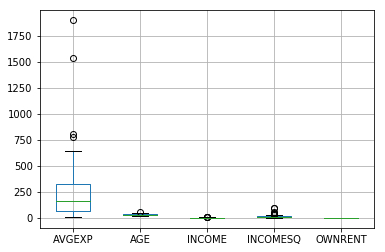

In [6]:
pd.plotting.boxplot(credit_card);

2. Fit a linear regression model to each of the datasets. Print and examine the summaries of the models.  The summary should report the parameter estimates and their standard errors.

In [7]:
prestige_model = GLM(family=Gaussian())
prestige_model.fit(prestige, formula="prestige ~ income + education")
prestige_model.summary()

Gaussian GLM Model Summary.
Name         Parameter Estimate  Standard Error
-----------------------------------------------
Intercept                 -6.06            4.27
income                     0.60            0.12
education                  0.55            0.10


In [8]:
credit_card_model = GLM(family=Gaussian())
credit_card_model.fit(credit_card, formula="AVGEXP ~ AGE + INCOME + INCOMESQ + OWNRENT")
credit_card_model.summary()

Gaussian GLM Model Summary.
Name         Parameter Estimate  Standard Error
-----------------------------------------------
Intercept               -237.15          199.35
AGE                       -3.08            5.51
INCOME                   234.35           80.37
INCOMESQ                 -15.00            7.47
OWNRENT                   27.94           82.92


3. Plot the residuals of the models against the predicted values.  Do these residuals show any concerning patterns?  If so, how should you deal with them?
   

In [9]:
prestige_model.predict(prestige)

array([77.99848822, 78.52747734, 89.05701836, 75.99069411, 79.19595386,
       52.35877472, 83.01679123, 96.41735374, 81.53798624, 83.98581644,
       59.47382488, 92.93075464, 92.38492073, 64.33343115, 72.34539827,
       57.99738443, 50.23070254, 60.4260053 , 43.0988076 , 85.39487773,
       50.59863038, 52.69537753, 65.61984983, 38.59028437, 19.06290625,
       43.36330216, 57.71604509, 32.95640375, 19.11580516, 33.92542896,
       18.74551277,  1.94730419, 33.27379723,  9.69477675, 14.69623497,
       17.42540452, 17.70674387, 18.79841169,  8.60310893, 14.32594259,
       17.49514822, 17.75964278,  9.04314502, 39.94644675, 16.19188475])

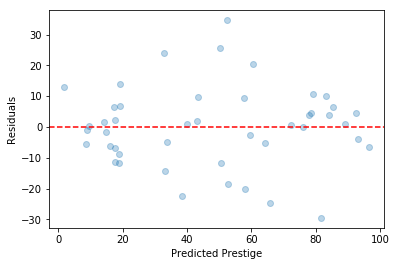

In [10]:
fig, ax = plt.subplots()
predictions = prestige_model.predict(prestige)
ax.scatter(predictions,
           prestige['prestige'] - predictions,
           alpha=0.3)
ax.axhline(0, color='r', ls='--')
ax.set_xlabel('Predicted Prestige')
ax.set_ylabel('Residuals');

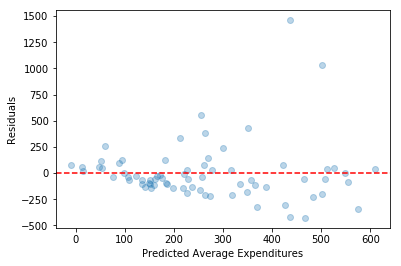

In [11]:
fig, ax = plt.subplots()
predictions = credit_card_model.predict(credit_card)
ax.scatter(predictions,
           credit_card['AVGEXP'] - predictions,
           alpha=0.3)
ax.axhline(0, color='r', ls='--')
ax.set_xlabel('Predicted Average Expenditures')
ax.set_ylabel('Residuals');

*In the second plot the variance of residuals increases with increasing predictions. This might be fixed by instead predicting the log of the average expenditures.*

4. By inspecting the residual plots, which model is more likely to have **heteroscedastic** residuals? Explain what heteroscedasticity means.

*The second plot is likely has heteroscedastic residuals, meaning the variance of the residuals depends on the exogenous variables.*

5. What uses of the model would heteroscedasticity (a violation of homoscedasticity) invalidate?

Heteroscedasticity would invalidate the use of the model for inference.

6. One of the most common treatments to reducing heteroscedasticity is to take the logarithm of the response variable, especially if the conditional distribution of the response variable is skewed. Take the log of `AVGEXP` in `ccard` data. Re-fit the model to the logarithm of `AVGEXP`, and re-plot the residuals. 

In [12]:
credit_card['LOGAVGEXP'] = np.log(credit_card['AVGEXP'])
credit_card_log_model = GLM(family=Gaussian())
credit_card_log_model.fit(credit_card, formula="LOGAVGEXP ~ AGE + INCOME + INCOMESQ + OWNRENT")

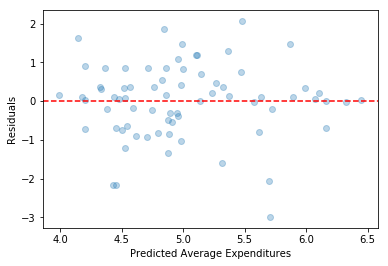

In [13]:
fig, ax = plt.subplots()
predictions = credit_card_log_model.predict(credit_card)
ax.scatter(predictions,
           credit_card['LOGAVGEXP'] - predictions,
           alpha=0.3)
ax.axhline(0, color='r', ls='--')
ax.set_xlabel('Predicted Average Expenditures')
ax.set_ylabel('Residuals');

7. To test if the residuals are normally distributed, the common practice is to use a qq-plot (for quantile-quantile-plot). The Q-Q plot plots the quantile of the normal distribution against that of the residuals and checks for alignment of the quantiles.
    
Make qq-plots for the residuals of the `prestige` and `ccard` (before `log` transform) models (it is assumed you will have to do a bit of research to make these plots, we've intentionally).  Apply the `log` transform to `AVGEXP` in `ccard` and repeat the plot.  What do you observe?

Text(0.5, 1.0, 'QQ Plot vs Normal dist for Prestige Residuals')

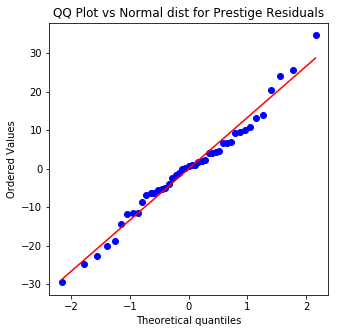

In [14]:
# for the prestige data
fig, ax = plt.subplots(figsize=((5, 5)))
predictions = prestige_model.predict(prestige)
stats.probplot(prestige['prestige'] - predictions, plot=ax);
ax.set_title("QQ Plot vs Normal dist for Prestige Residuals")

Text(0.5, 1.0, 'QQ Plot vs Normal dist for Credit Card Log Residuals')

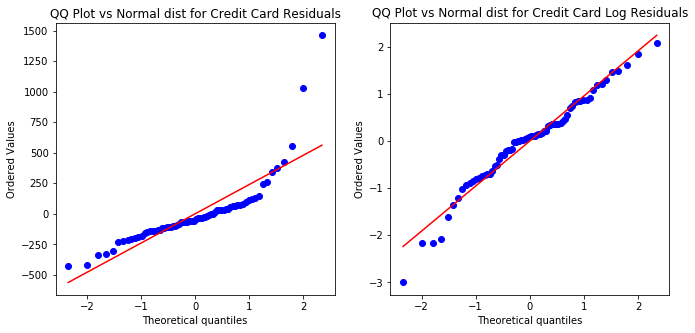

In [15]:
# for the prestige data
fig, axs = plt.subplots(1, 2, figsize=((11,5)))
predictions = credit_card_model.predict(credit_card)
stats.probplot(credit_card['AVGEXP'] - predictions, plot=axs[0]);
axs[0].set_title("QQ Plot vs Normal dist for Credit Card Residuals")

predictions = credit_card_log_model.predict(credit_card)
stats.probplot(credit_card['LOGAVGEXP'] - predictions, plot=axs[1]);
axs[1].set_title("QQ Plot vs Normal dist for Credit Card Log Residuals")

8. The `p_values_` attribute of the model contains the results of applying a z-test to the parameter estimates.  Discuss the following questions with your partner:
  - What assumptions must hold for this z-test to be valid?


*The coefficients must be normally distributed. That will be true as long as the sample is fairly large (and the errors aren't too badly behaved).*

  - What is the null hypothesis of this z-test?

*That the corresponding coefficient of the "true model" is zero, so that feature does not affect the result.*

  - What is the distribution of the parameter estimates under the null hypothesis?

*Normal, with a standard deviation equal to the standard error.*

9. See if you can calculate these p-values by hand, and see if your results match those given by the library.  If you're stuck, feel free to look through the source code of the `py-glm` library to find [where the code that calculates these p-values](https://github.com/madrury/py-glm/blob/f3d6f68b0024c5fab598749d20c758fd2e9ccb6c/glm/glm.py#L305) is located.

10. Give some examples of scientific questions that could be answered by these p-values.  Give some examples of questions that are *not* answered by these p-values.

*A question that could be answered: do people with more education have higher-prestige jobs?*

*A question that couldn't be answered: will providing someone more education result in them having a higher-prestige job?*